In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [8]:
results = pd.read_csv('../outputs/chunked_results.csv')

In [9]:
results['chars'] = results.apply(lambda row: f"{row['min_chars']}_{row['max_chars']}", axis=1)

In [10]:
# gpt-3.5-turbo-0125 performed poorly only recalling 40 studies so we are excluding it
results[results.model_name == 'gpt-3.5-turbo-0125']

results = results[results.model_name != 'gpt-3.5-turbo-0125']

### Zero Shot
#### Participant Count

In [6]:
# Zero shot
zero_shot_count = results[(results.task == 'demographics-zeroshot') & (results.variable == 'count')]

In [7]:
zero_shot_count[['model_name', 'chars', 'n_studies']]

,model_name,chars,n_studies
110,claude-3.5-sonnet,40_4000,275
120,firefunction-v1,2000_30000,264
130,firefunction-v1,40_4000,264
140,firefunction-v2,2000_30000,283
150,firefunction-v2,40_4000,282
170,gpt-3.5-turbo-0613,40_4000,264
180,gpt-3.5-turbo-1106,2000_30000,203
190,gpt-3.5-turbo-1106,40_4000,233
200,gpt-4-0125-preview,2000_30000,259
210,gpt-4-0125-preview,40_4000,261


GPT-4o responds slightly less frequently, missing around 11 papers

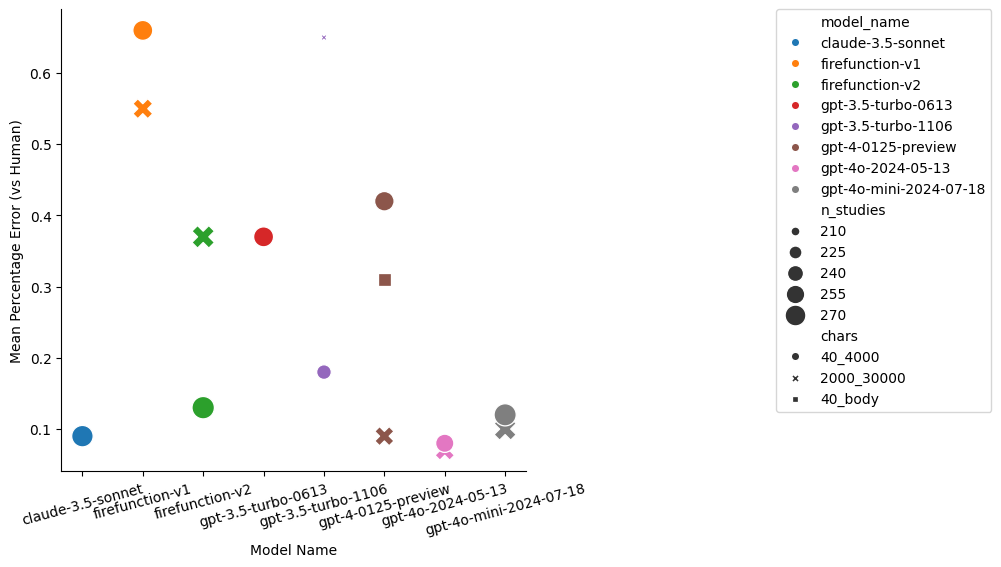

In [8]:
plt.figure(figsize=(6, 6))
g = sns.scatterplot(data=zero_shot_count, x='model_name', y='avg_mean_percentage_error', hue='model_name', size='n_studies', 
                    style='chars', sizes=(20, 264))
g.set_ylabel('Mean Percentage Error (vs Human)')
g.set_xlabel('Model Name')
sns.despine()
plt.legend(bbox_to_anchor=(2, 1), borderaxespad=0)
plt.xticks(rotation=15)
plt.savefig('../outputs/figures/avg_mean_percentage_error_demographics_zeroshot.png', bbox_inches='tight')

Lower scores are better. 

GPT-4 performed the best, GPT-3.5 somewhat similarly (for much less cost-- although with poorer recall, especially model 1106).

FireFunction performed worse (although still somewhat decently), with high recall.

GPT 3.5 turbo 0613 showed the best balance of performance and cost.

([0, 1, 2, 3, 4, 5, 6, 7],
 [Text(0, 0, 'claude-3.5-sonnet'),
  Text(1, 0, 'firefunction-v1'),
  Text(2, 0, 'firefunction-v2'),
  Text(3, 0, 'gpt-3.5-turbo-0613'),
  Text(4, 0, 'gpt-3.5-turbo-1106'),
  Text(5, 0, 'gpt-4-0125-preview'),
  Text(6, 0, 'gpt-4o-2024-05-13'),
  Text(7, 0, 'gpt-4o-mini-2024-07-18')])

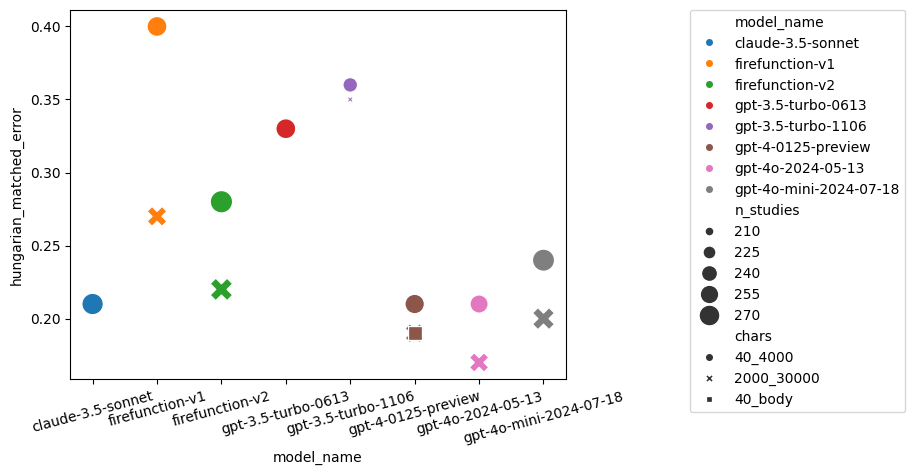

In [9]:
g = sns.scatterplot(data=zero_shot_count, x='model_name', y='hungarian_matched_error', hue='model_name', size='n_studies', 
                    style='chars', sizes=(20, 264))
plt.legend(bbox_to_anchor=(1.25, 1), borderaxespad=0)
plt.xticks(rotation=15)


Using Hungarian matching, we get similar results, with GPT-4 performing best

([0, 1, 2, 3, 4, 5, 6, 7],
 [Text(0, 0, 'claude-3.5-sonnet'),
  Text(1, 0, 'firefunction-v1'),
  Text(2, 0, 'firefunction-v2'),
  Text(3, 0, 'gpt-3.5-turbo-0613'),
  Text(4, 0, 'gpt-3.5-turbo-1106'),
  Text(5, 0, 'gpt-4-0125-preview'),
  Text(6, 0, 'gpt-4o-2024-05-13'),
  Text(7, 0, 'gpt-4o-mini-2024-07-18')])

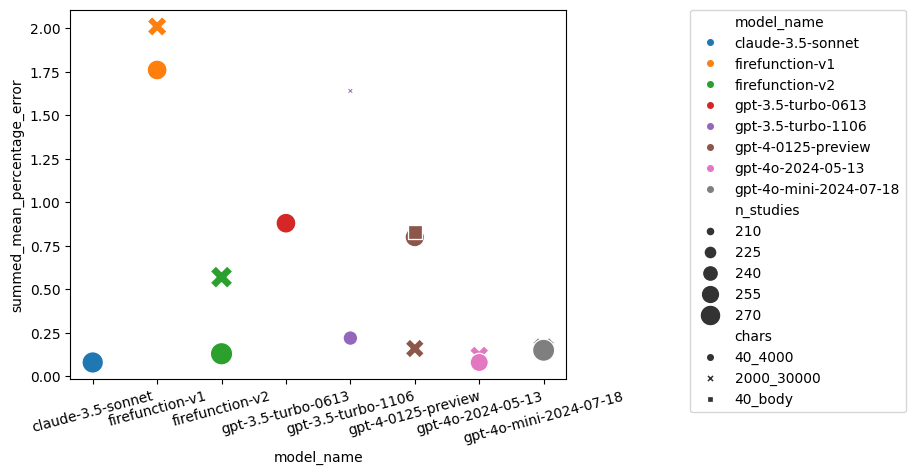

In [10]:
g = sns.scatterplot(data=zero_shot_count, x='model_name', y='summed_mean_percentage_error', hue='model_name', size='n_studies', 
                    style='chars', sizes=(20, 264))
plt.legend(bbox_to_anchor=(1.25, 1), borderaxespad=0)
plt.xticks(rotation=15)


Using `summed` percentage error, FireFunction does quite a bit worse, because it "over-extracts" groups. That is, instead of reporting once the value, it reports all found values in the text.

([0, 1, 2, 3, 4, 5, 6, 7],
 [Text(0, 0, 'claude-3.5-sonnet'),
  Text(1, 0, 'firefunction-v1'),
  Text(2, 0, 'firefunction-v2'),
  Text(3, 0, 'gpt-3.5-turbo-0613'),
  Text(4, 0, 'gpt-3.5-turbo-1106'),
  Text(5, 0, 'gpt-4-0125-preview'),
  Text(6, 0, 'gpt-4o-2024-05-13'),
  Text(7, 0, 'gpt-4o-mini-2024-07-18')])

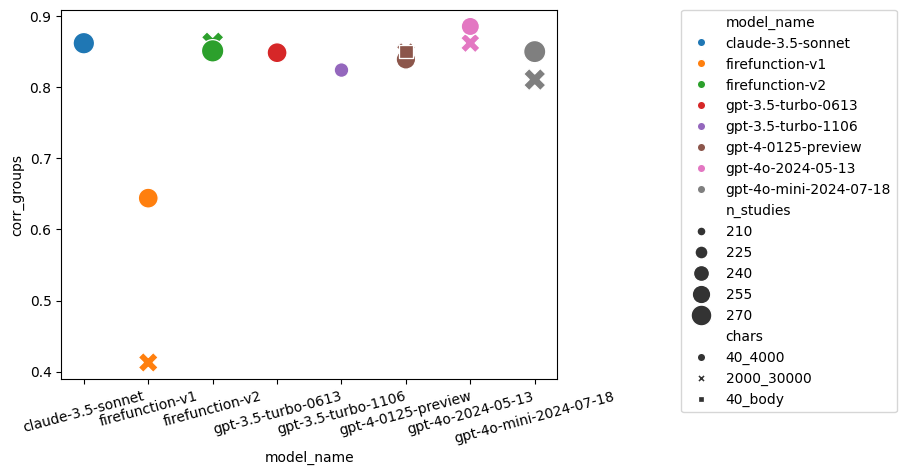

In [11]:
g = sns.scatterplot(data=zero_shot_count, x='model_name', y='corr_groups', hue='model_name', size='n_studies', 
                    style='chars', sizes=(20, 264))
plt.legend(bbox_to_anchor=(1.25, 1), borderaxespad=0)
plt.xticks(rotation=15)


This can be seen by plotting the percentage of times each model got the correct number of groups

##### Mean Age

In [12]:
zero_shot_age_mean = results[(results.task == 'demographics-zeroshot') & (results.variable == 'age_mean')]

([0, 1, 2, 3, 4, 5, 6, 7],
 [Text(0, 0, 'claude-3.5-sonnet'),
  Text(1, 0, 'firefunction-v1'),
  Text(2, 0, 'firefunction-v2'),
  Text(3, 0, 'gpt-3.5-turbo-0613'),
  Text(4, 0, 'gpt-3.5-turbo-1106'),
  Text(5, 0, 'gpt-4-0125-preview'),
  Text(6, 0, 'gpt-4o-2024-05-13'),
  Text(7, 0, 'gpt-4o-mini-2024-07-18')])

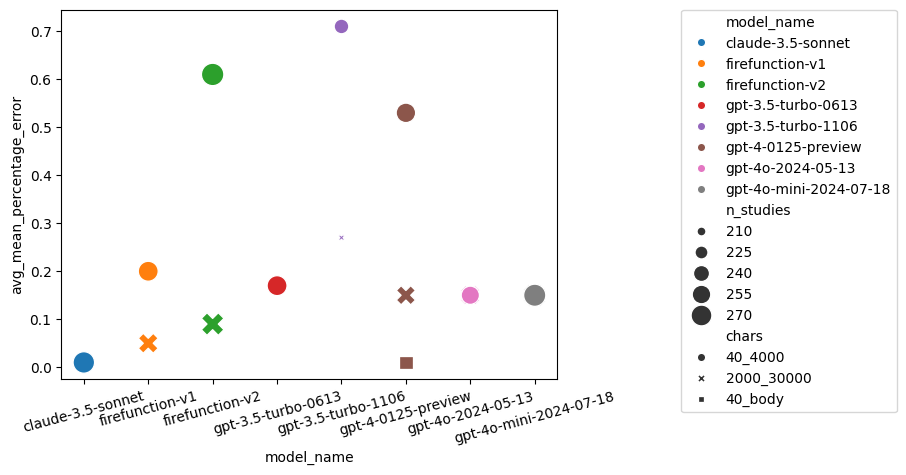

In [13]:
g = sns.scatterplot(data=zero_shot_age_mean, x='model_name', y='avg_mean_percentage_error', hue='model_name', size='n_studies', 
                    style='chars', sizes=(20, 264))
plt.legend(bbox_to_anchor=(1.25, 1), borderaxespad=0)
plt.xticks(rotation=15)


([0, 1, 2, 3, 4, 5, 6, 7],
 [Text(0, 0, 'claude-3.5-sonnet'),
  Text(1, 0, 'firefunction-v1'),
  Text(2, 0, 'firefunction-v2'),
  Text(3, 0, 'gpt-3.5-turbo-0613'),
  Text(4, 0, 'gpt-3.5-turbo-1106'),
  Text(5, 0, 'gpt-4-0125-preview'),
  Text(6, 0, 'gpt-4o-2024-05-13'),
  Text(7, 0, 'gpt-4o-mini-2024-07-18')])

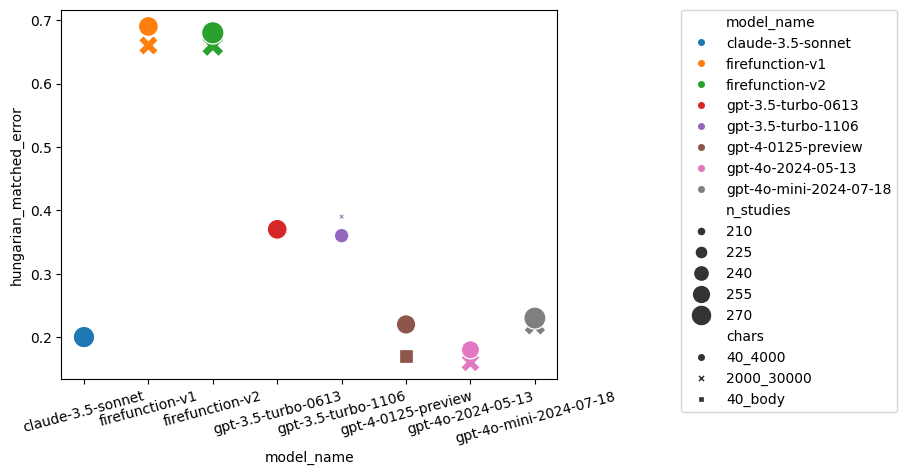

In [14]:
g = sns.scatterplot(data=zero_shot_age_mean, x='model_name', y='hungarian_matched_error', hue='model_name', size='n_studies', 
                    style='chars', sizes=(20, 264))
plt.legend(bbox_to_anchor=(1.25, 1), borderaxespad=0)
plt.xticks(rotation=15)


Looking at mean age, FireFunction performed reasonably well (although worse than GPT-4), although with the same problem of "over-extracting" participant groups as before. 

([0, 1, 2, 3, 4, 5, 6, 7],
 [Text(0, 0, 'claude-3.5-sonnet'),
  Text(1, 0, 'firefunction-v1'),
  Text(2, 0, 'firefunction-v2'),
  Text(3, 0, 'gpt-3.5-turbo-0613'),
  Text(4, 0, 'gpt-3.5-turbo-1106'),
  Text(5, 0, 'gpt-4-0125-preview'),
  Text(6, 0, 'gpt-4o-2024-05-13'),
  Text(7, 0, 'gpt-4o-mini-2024-07-18')])

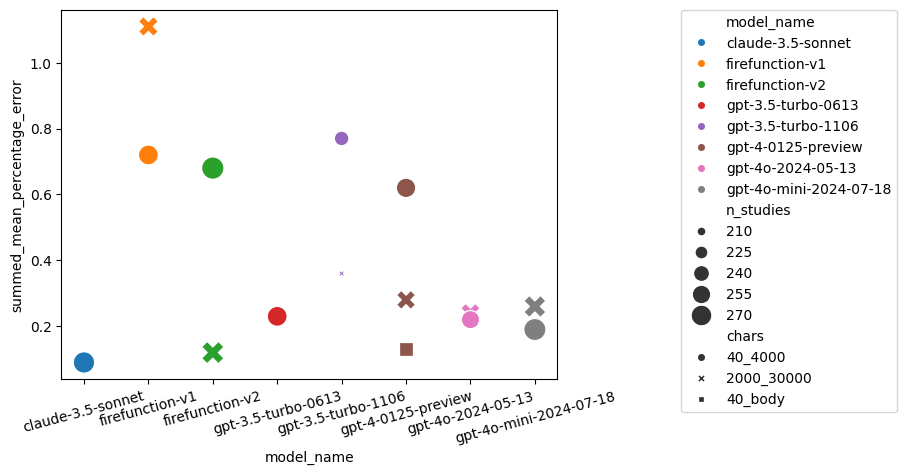

In [15]:
g = sns.scatterplot(data=zero_shot_age_mean, x='model_name', y='summed_mean_percentage_error', hue='model_name', size='n_studies', 
                    style='chars', sizes=(20, 264))
plt.legend(bbox_to_anchor=(1.25, 1), borderaxespad=0)
plt.xticks(rotation=15)


### Tip prompting

Motivating models with a "tip" supposedly improves performance.
We tried this w/ the FireFunction-V1 model

In [16]:
tipping = results[(results.task.isin(['demographics-tip', 'demographics-zeroshot'])) & (results.min_chars == 40) & (results.model_name == 'firefunction-v1')]

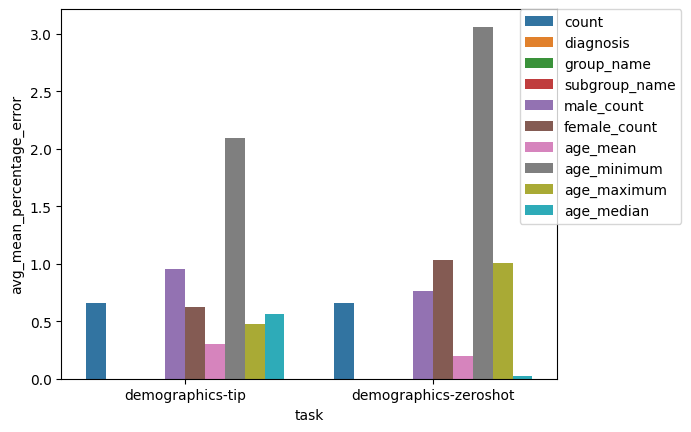

In [17]:
sns.barplot(data=tipping, x='task', y='avg_mean_percentage_error', hue='variable')
plt.legend(bbox_to_anchor=(1.25, 1), borderaxespad=0)

Across all variables, tipping reduced mean percentage error for the FireFunction model

## Few Shot Learning

In [18]:
model_names = results[(results.task == 'demographics-fewshot')].model_name.unique()

# Select comparable zero shot results

few_shot = results[
    (results.task.isin(['demographics-fewshot', 'demographics-zeroshot'])) & \
    (results.model_name.isin(model_names)) & \
    (results.chars == '40_4000')
    ]
few_shot = few_shot[few_shot.variable.isin(['count', 'age_mean', 'age_maximum', 'male_count'])]

In [19]:
few_shot[(few_shot.task == 'demographics-fewshot')]

# GPT 4o was slightly less likely to respond than other models, but not by much (257/264 studies for count)

,variable,hungarian_matched_error,counts,avg_mean_percentage_error,summed_mean_percentage_error,n_studies,task,model_name,min_chars,max_chars,corr_groups,more_groups,less_groups,chars
40,count,0.45,1.00,0.23,0.40,283,demographics-fewshot,firefunction-v1,40,4000,0.713781,0.187279,0.098940,40_4000
44,male_count,0.68,1.00,0.19,0.40,283,demographics-fewshot,firefunction-v1,40,4000,0.713781,0.187279,0.098940,40_4000
46,age_mean,0.72,1.00,0.13,0.35,283,demographics-fewshot,firefunction-v1,40,4000,0.713781,0.187279,0.098940,40_4000
48,age_maximum,0.76,1.00,0.71,0.95,283,demographics-fewshot,firefunction-v1,40,4000,0.713781,0.187279,0.098940,40_4000
50,count,0.51,1.00,0.59,1.34,272,demographics-fewshot,gpt-3.5-turbo-0613,40,4000,0.613971,0.268382,0.117647,40_4000
54,male_count,0.58,0.84,0.99,2.43,272,demographics-fewshot,gpt-3.5-turbo-0613,40,4000,0.613971,0.268382,0.117647,40_4000
56,age_mean,0.49,0.84,0.33,0.68,272,demographics-fewshot,gpt-3.5-turbo-0613,40,4000,0.613971,0.268382,0.117647,40_4000
58,age_maximum,0.45,0.54,0.31,0.75,272,demographics-fewshot,gpt-3.5-turbo-0613,40,4000,0.613971,0.268382,0.117647,40_4000
60,count,0.27,1.00,0.15,0.26,277,demographics-fewshot,gpt-4-0125-preview,40,4000,0.768953,0.126354,0.104693,40_4000
64,male_count,0.31,0.96,0.10,0.19,277,demographics-fewshot,gpt-4-0125-preview,40,4000,0.768953,0.126354,0.104693,40_4000


/home/zorro/anaconda3/envs/llm-predict/lib/python3.11/site-packages/seaborn/axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


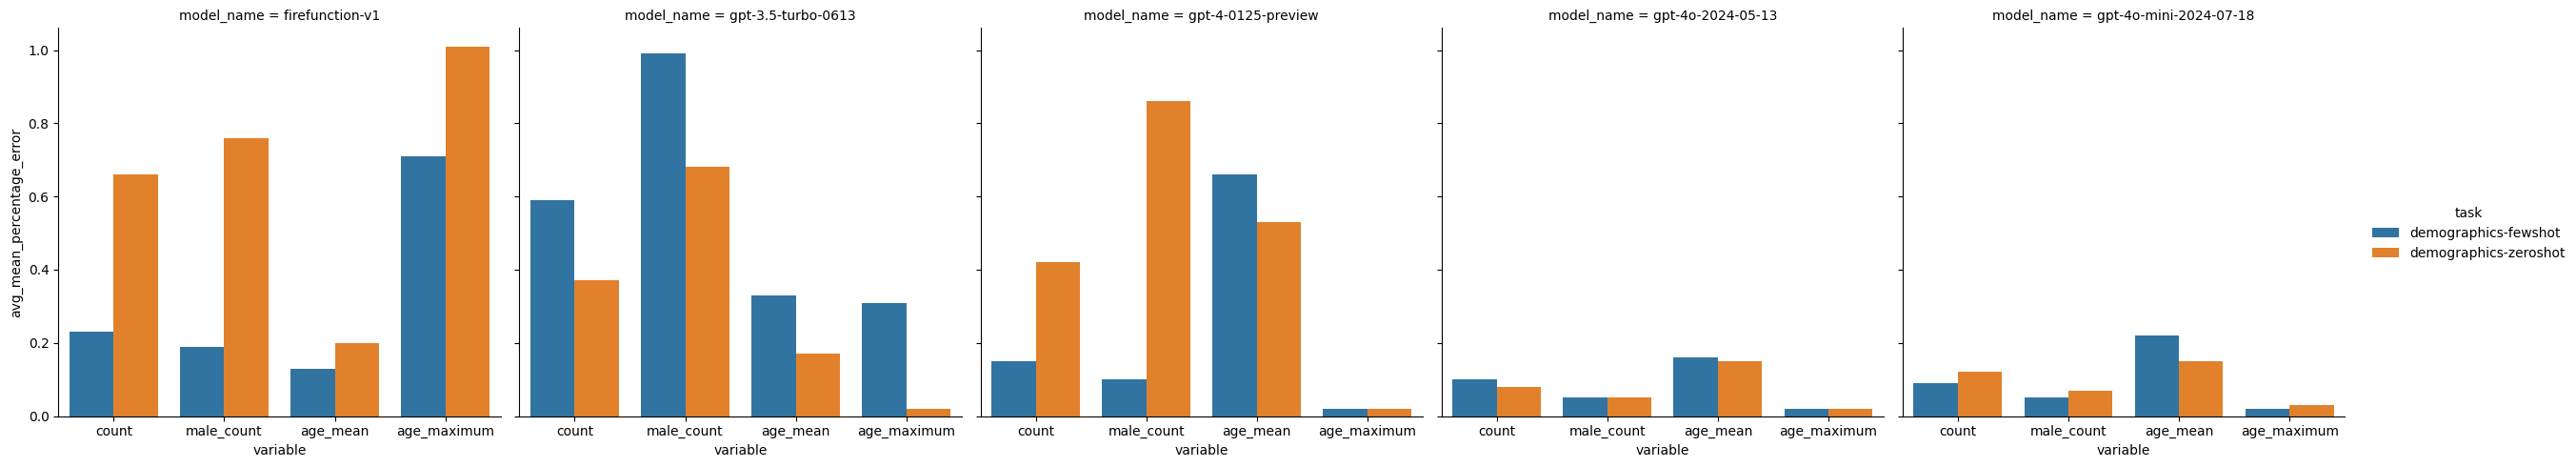

In [20]:
sns.catplot(data=few_shot, x='variable', y='avg_mean_percentage_error', kind='bar', hue='task', col='model_name', legend='full')

FireFunction and GPT-4 greatly improved with few-shot prompt, whereas GPT-3.5 actually got worse.
GPT 4o does *excellent* with or without few shot prompting.

/home/zorro/anaconda3/envs/llm-predict/lib/python3.11/site-packages/seaborn/axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


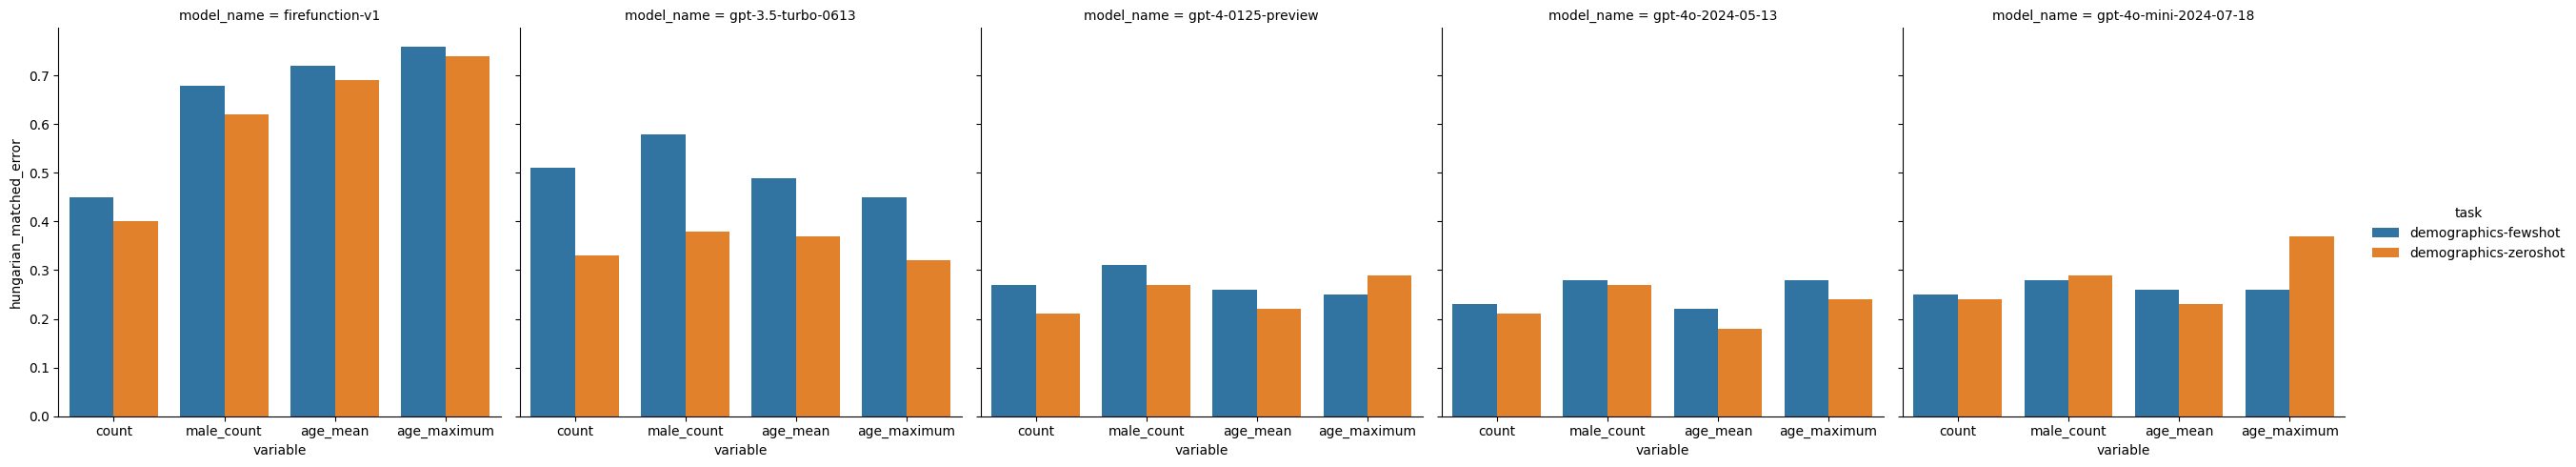

In [21]:
sns.catplot(data=few_shot, x='variable', y='hungarian_matched_error', kind='bar', hue='task', col='model_name', legend='full')

However, when looking at hungarian matched error, few shot didn't seem to help. It's unclear why. 

/home/zorro/anaconda3/envs/llm-predict/lib/python3.11/site-packages/seaborn/axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


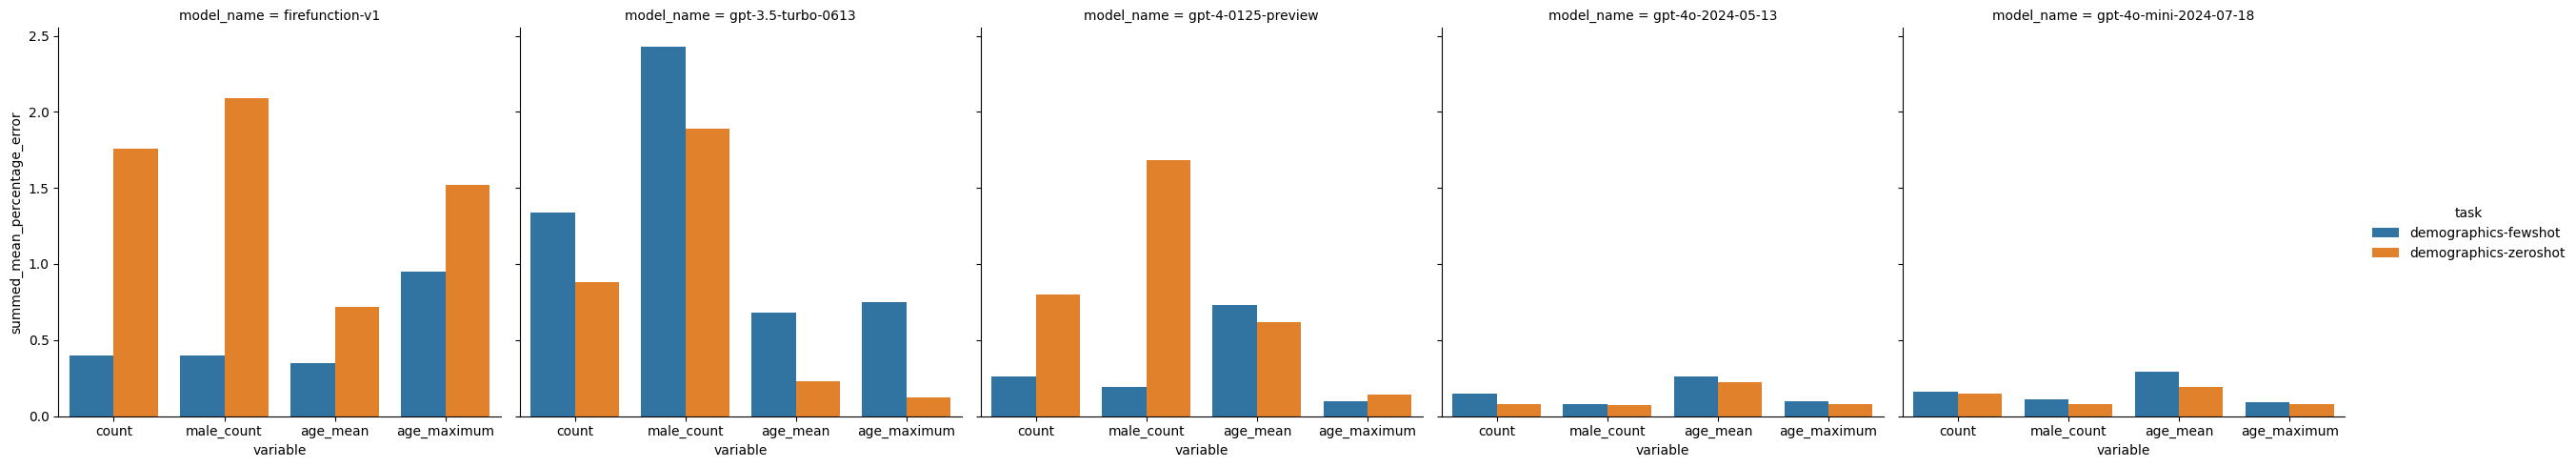

In [22]:
sns.catplot(data=few_shot, x='variable', y='summed_mean_percentage_error', kind='bar', hue='task', col='model_name', legend='full')

Overall, Firefunction performed reasonably well, even using summed percentage error. 

GPT 4o is the clear winner, however.

/home/zorro/anaconda3/envs/llm-predict/lib/python3.11/site-packages/seaborn/axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


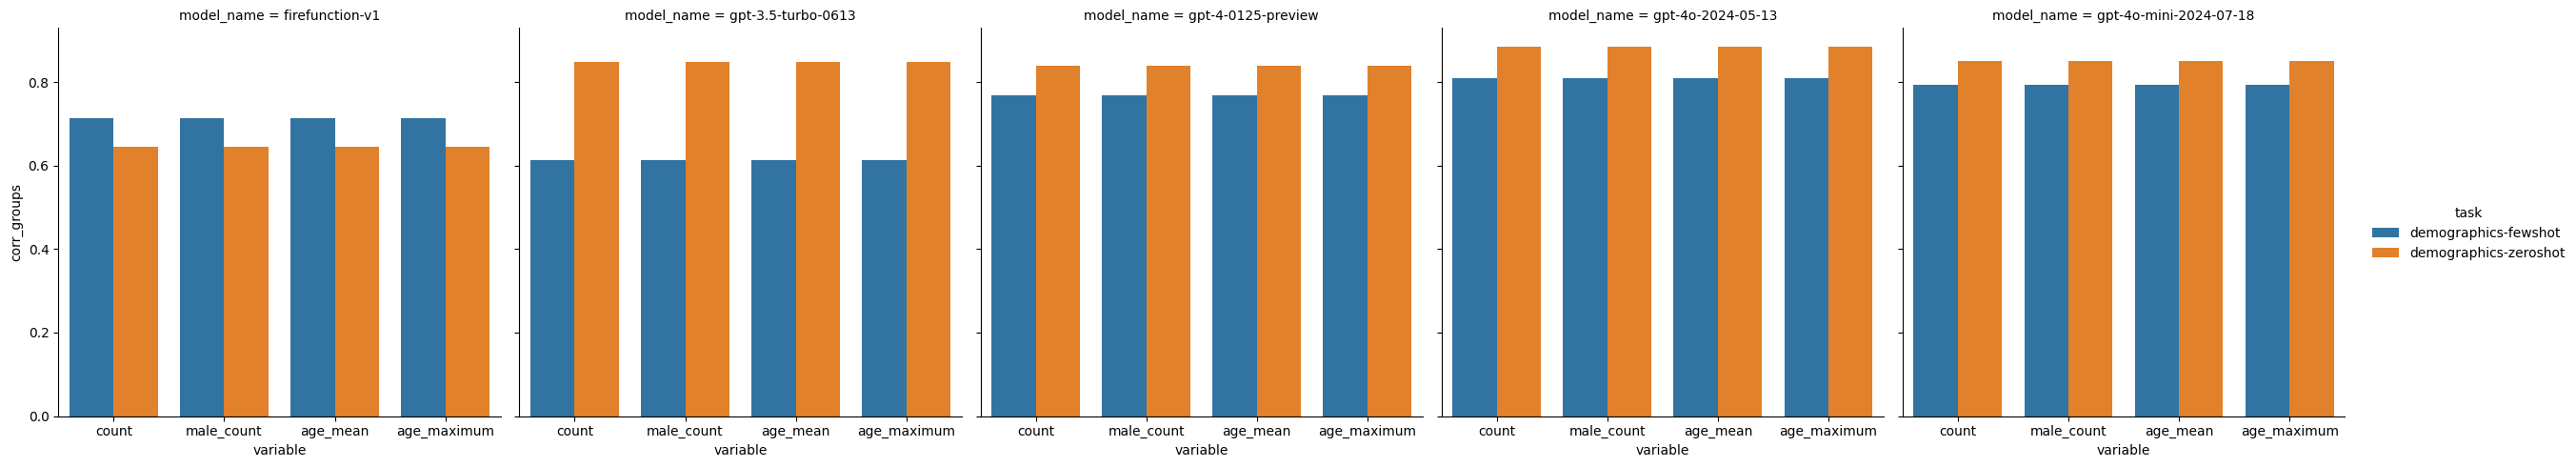

In [23]:
sns.catplot(data=few_shot, x='variable', y='corr_groups', kind='bar', hue='task', col='model_name', legend='full')

It still struggled to get the correct number of groups, which probably explains the majority of its error rate. 
GPT 4o again, excelled at this. 

#### Comparing GPT-4o context window on few shot learning

In [24]:
gpto_few_shot = results[
    (results.task == 'demographics-fewshot') & \
    (results.model_name == 'gpt-4o-2024-05-13')
    ]

/home/zorro/anaconda3/envs/llm-predict/lib/python3.11/site-packages/seaborn/axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


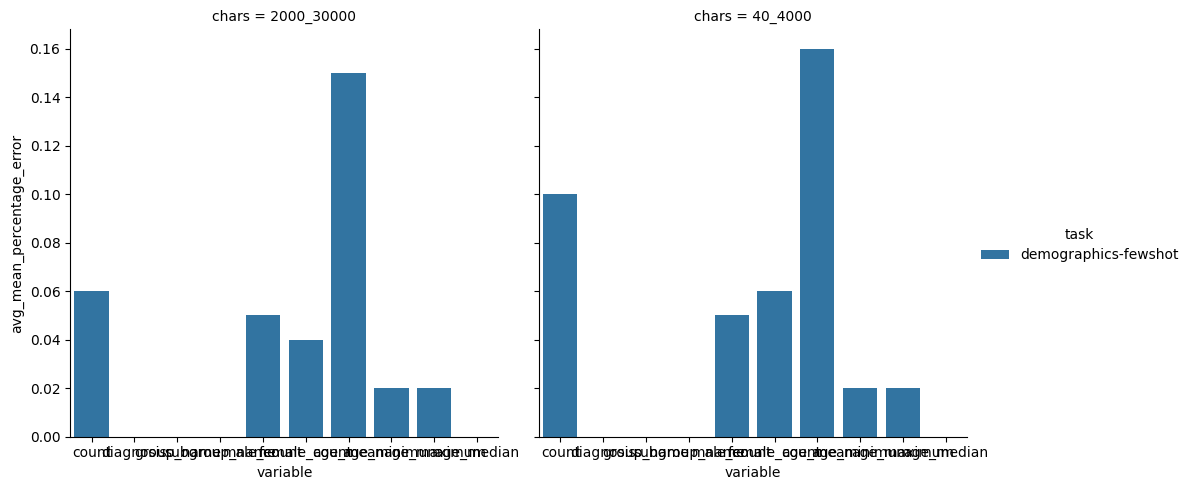

In [25]:
sns.catplot(data=gpto_few_shot, x='variable', y='avg_mean_percentage_error', kind='bar', hue='task', col='chars', legend='full')

/home/zorro/anaconda3/envs/llm-predict/lib/python3.11/site-packages/seaborn/axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


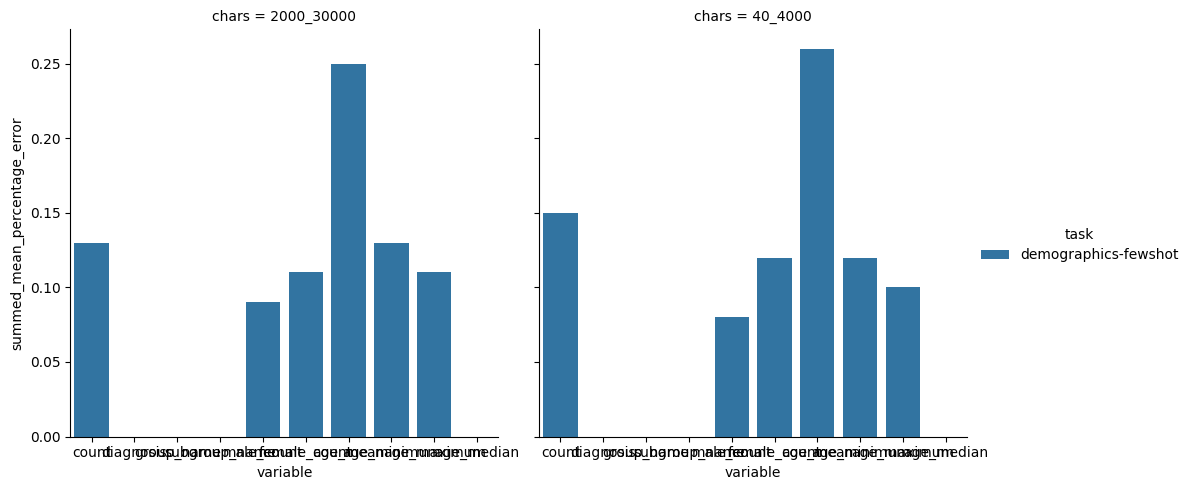

In [26]:
sns.catplot(data=gpto_few_shot, x='variable', y='summed_mean_percentage_error', kind='bar', hue='task', col='chars', legend='full')

40-4000 chars was sufficient for optimal peformance (and cheaper)

### Few Shot Learning 2

Here, we iterated on the few-shot prompt, to better identify "behavioral" samples from others by instead asking for a "assesment_type" column
We filter out behavioral samples prior to evaluation.

In [27]:
few_shot_2 = results[
    (results.task.isin(['demographics-fewshot', 'demographics-fewshot2'])) & \
    (results.model_name == 'firefunction-v1') & \
    (results.chars == '40_4000')
    ]
few_shot_2 = few_shot_2[few_shot_2.variable.isin(['count', 'age_mean', 'age_maximum', 'male_count'])]

In [28]:
few_shot_2.task.unique()

array(['demographics-fewshot2', 'demographics-fewshot'], dtype=object)

/home/zorro/anaconda3/envs/llm-predict/lib/python3.11/site-packages/seaborn/axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


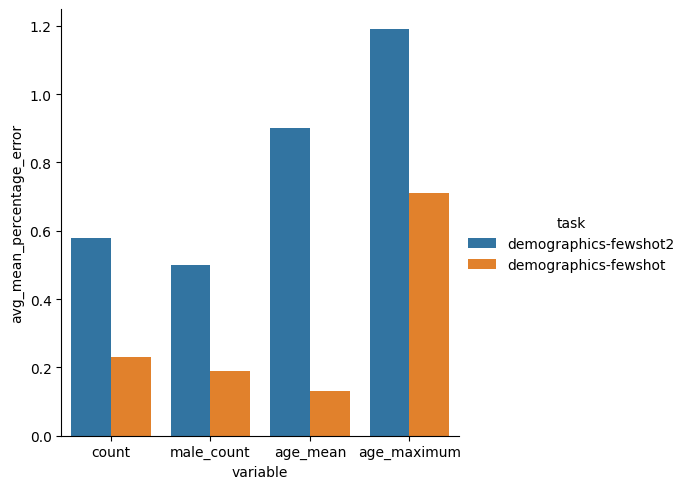

In [29]:
sns.catplot(data=few_shot_2, x='variable', y='avg_mean_percentage_error', kind='bar', hue='task', legend='full')

/home/zorro/anaconda3/envs/llm-predict/lib/python3.11/site-packages/seaborn/axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


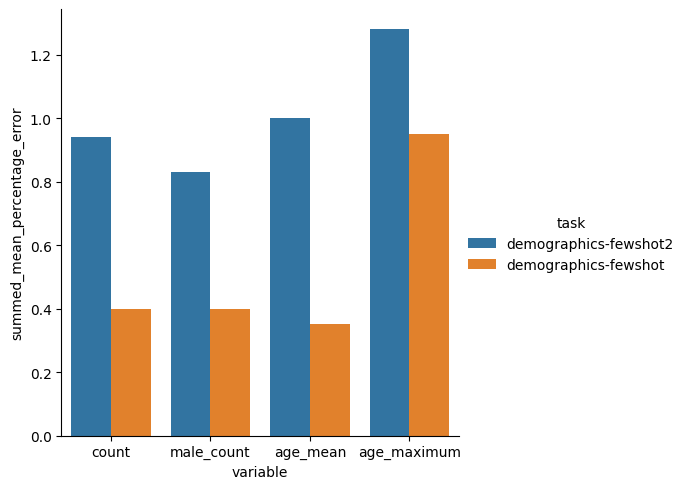

In [30]:
sns.catplot(data=few_shot_2, x='variable', y='summed_mean_percentage_error', kind='bar', hue='task', legend='full')

### GPT-4o

In [31]:
few_shot_2_gpt = results[
    (results.task.isin(['demographics-fewshot', 'demographics-fewshot2'])) & \
    (results.model_name == 'gpt-4o-2024-05-13') & \
    (results.chars == '40_4000')
    ]
few_shot_2_gpt = few_shot_2_gpt[few_shot_2_gpt.variable.isin(['count', 'age_mean', 'age_maximum', 'male_count'])]

/home/zorro/anaconda3/envs/llm-predict/lib/python3.11/site-packages/seaborn/axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


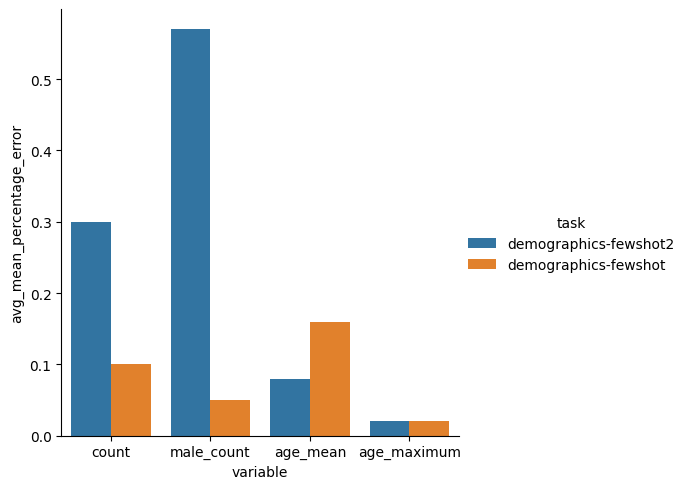

In [32]:
sns.catplot(data=few_shot_2_gpt, x='variable', y='avg_mean_percentage_error', kind='bar', hue='task', legend='full')

/home/zorro/anaconda3/envs/llm-predict/lib/python3.11/site-packages/seaborn/axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


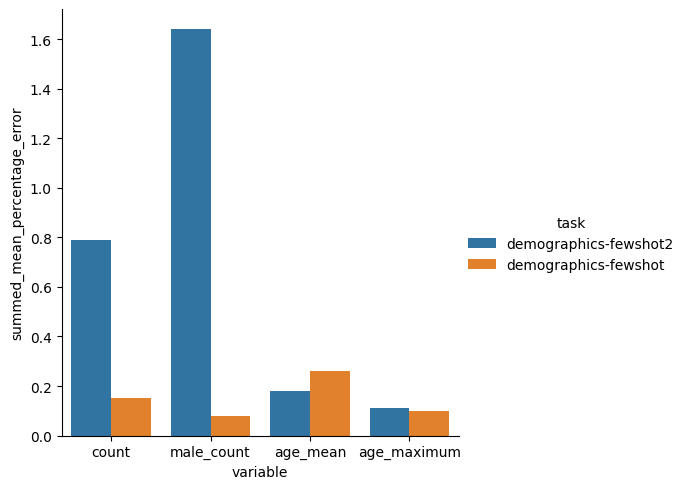

In [33]:
sns.catplot(data=few_shot_2_gpt, x='variable', y='summed_mean_percentage_error', kind='bar', hue='task', legend='full')